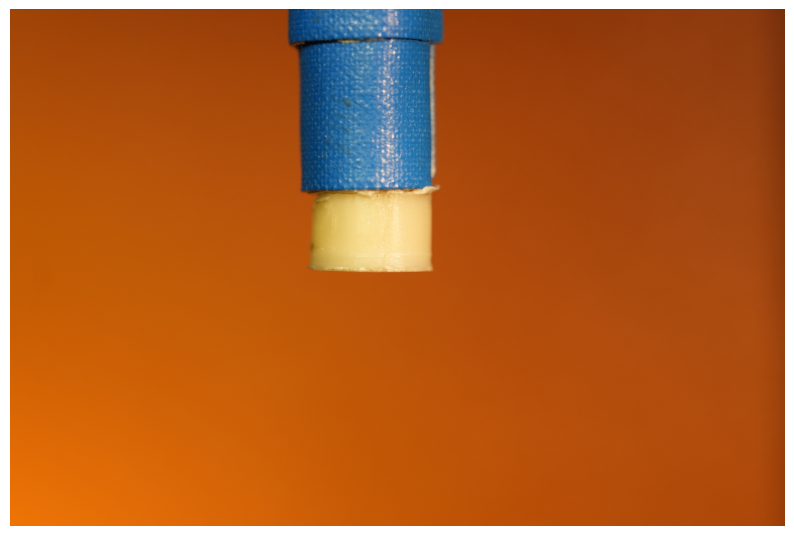

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/vamsikrishna/Desktop/DSC00250.JPG')  # Update this to the path of your image file

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding to get binary image
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Defining the region of interest (ROI) at the bottom of the image
roi_height_percentage = 0.2  # Modify as needed for your image
roi_start_point = int(image.shape[0] * (1 - roi_height_percentage))
roi_mask = np.zeros_like(gray)
roi_mask[roi_start_point:image.shape[0], :] = 255

# Apply the ROI mask to the thresholded image
roi_thresh = cv2.bitwise_and(thresh, thresh, mask=roi_mask)

# Find contours on the ROI thresholded image
contours_roi, _ = cv2.findContours(roi_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area and aspect ratio
def filter_contours(contours, min_area=500, aspect_ratio_range=(0.5, 3.0)):
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = w / float(h)
            if aspect_ratio_range[0] <= aspect_ratio <= aspect_ratio_range[1]:
                filtered_contours.append(contour)
    return filtered_contours

filtered_contours = filter_contours(contours_roi)

# Draw the filtered contours on the original image
image_with_filtered_contours = image.copy()
cv2.drawContours(image_with_filtered_contours, filtered_contours, -1, (0, 255, 50), 2)

# Convert the image with filtered contours to RGB format for displaying
image_with_filtered_contours_rgb = cv2.cvtColor(image_with_filtered_contours, cv2.COLOR_BGR2RGB)

# Display the image with filtered contours using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_with_filtered_contours_rgb)
plt.axis('off')  # Turn off the axis labels
plt.show()

# Save the result
# output_path = '/Users/vamsikrishna/Desktop/filtered_contours.jpg'  # Replace with your desired output path
# save_success = cv2.imwrite(output_path, image)

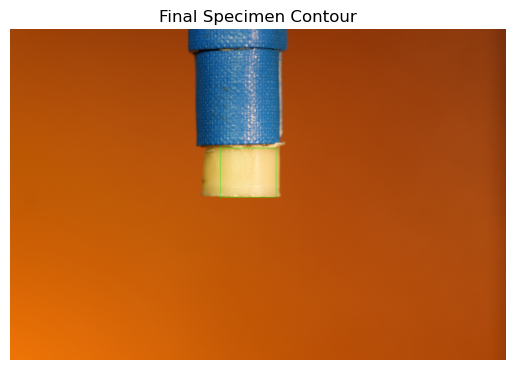

In [23]:
import cv2
import numpy as np

# Load the image
file_path = '/Users/vamsikrishna/Desktop/DSC00250.JPG'  # Make sure to use the correct path to your image
image = cv2.imread(file_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding to find white regions
_, binary = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assume the specimen is the largest contour in the image
specimen_contour = max(contours, key=cv2.contourArea)

# Get the bounding rectangle for the contour
x, y, w, h = cv2.boundingRect(specimen_contour)

# Calculate pixels-per-centimeter (ppcm) as an approximation
ppcm = 100  # Adjust based on actual image resolution

# Extend the contour slightly more to the left for a perfect fit
slightly_more_extra_width_final = int(ppcm * 0.05)  # Adjust as necessary based on previous steps

# Adjust the left side of the bounding rectangle with the slightly more extra width
x_new_slightly_more_final = max(x - slightly_more_extra_width_final, 0)
w_new_slightly_more_final = w + slightly_more_extra_width_final

# Draw the new, slightly more extended rectangle on the image
cv2.rectangle(image, (x_new_slightly_more_final, y), (x_new + w_new, y + h), (0, 255, 0), 3)

# Save the image with the final contour
output_path = 'path_to_your_output/DSC00250_specimen_final.jpg'  # Specify the output path
cv2.imwrite(output_path, image)

# Display the result (optional, for Jupyter notebooks)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Final Specimen Contour')
plt.axis('off')
plt.show()


In [24]:
import cv2
import numpy as np

# Load the image
image_path = "/Users/vamsikrishna/Desktop/DSC00250.JPG"
image = cv2.imread(image_path)

# Check if the image has been loaded correctly
if image is None:
    raise ValueError("Could not open or find the image.")


In [25]:
# Convert the image to the HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the color range for masking
# These values may need to be adjusted for your specific image
white_lower = np.array([0, 0, 168])
white_upper = np.array([172, 111, 255])

# Threshold the HSV image to get only the specimen colors
mask = cv2.inRange(hsv, white_lower, white_upper)

# Optional: perform a series of dilations and erosions to remove any small blobs left in the mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)


In [26]:
# Find contours from the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming the largest contour is the specimen
specimen_contour = max(contours, key=cv2.contourArea)

# Draw the contour on the image
cv2.drawContours(image, [specimen_contour], -1, (0, 255, 0), 3)


array([[[  8,  71, 161],
        [ 10,  73, 163],
        [ 11,  73, 163],
        ...,
        [ 12,  46, 116],
        [ 16,  50, 120],
        [ 14,  48, 118]],

       [[  6,  69, 159],
        [  6,  69, 159],
        [  8,  70, 160],
        ...,
        [ 12,  46, 116],
        [ 15,  50, 118],
        [ 13,  48, 116]],

       [[  9,  71, 161],
        [  8,  70, 160],
        [  9,  69, 159],
        ...,
        [ 12,  47, 115],
        [ 16,  51, 119],
        [ 14,  49, 117]],

       ...,

       [[  6, 114, 239],
        [  7, 115, 240],
        [  7, 116, 238],
        ...,
        [ 10,  62, 152],
        [  9,  61, 151],
        [  8,  60, 150]],

       [[  8, 116, 241],
        [  7, 115, 240],
        [  7, 116, 238],
        ...,
        [ 11,  63, 153],
        [  9,  62, 149],
        [  8,  61, 148]],

       [[  8, 116, 241],
        [  7, 115, 240],
        [  7, 116, 238],
        ...,
        [ 10,  62, 152],
        [ 11,  61, 149],
        [ 11,  61, 149]]

In [27]:
# Calculate the centerline
height, width, _ = image.shape
center_x = width // 2

# Draw the centerline
cv2.line(image, (center_x, 0), (center_x, height), (255, 0, 0), 2)

# Calculate the radius at each height
for point in specimen_contour:
    x, y = point[0]
    radius = abs(center_x - x)
    # Here, you would store the radius and the corresponding height (y)


In [28]:
# Import the necessary libraries
import cv2
import numpy as np

# Load the image
image_path = "/Users/vamsikrishna/Desktop/DSC00250.JPG"
image = cv2.imread(image_path)

# Check if the image has been loaded correctly
if image is None:
    raise ValueError("Could not open or find the image.")

# Convert the image to the HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the color range for masking
white_lower = np.array([0, 0, 168])
white_upper = np.array([172, 111, 255])

# Threshold the HSV image to get only the specimen colors
mask = cv2.inRange(hsv, white_lower, white_upper)

# Perform a series of dilations and erosions to remove any small blobs left in the mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Find contours from the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming the largest contour is the specimen
specimen_contour = max(contours, key=cv2.contourArea)

# Draw the contour


In [29]:
# Import the necessary libraries
import cv2
import numpy as np

# Load the image
image_path = "/Users/vamsikrishna/Desktop/DSC00250.JPG"
image = cv2.imread(image_path)

# Check if the image has been loaded correctly
if image is None:
    raise ValueError("Could not open or find the image.")

# Convert the image to the HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the color range for masking
white_lower = np.array([0, 0, 168])
white_upper = np.array([172, 111, 255])

# Threshold the HSV image to get only the specimen colors
mask = cv2.inRange(hsv, white_lower, white_upper)

# Perform a series of dilations and erosions to remove any small blobs left in the mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Find contours from the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming the largest contour is the specimen
specimen_contour = max(contours, key=cv2.contourArea)

# Draw the contour on the image
cv2.drawContours(image, [specimen_contour], -1, (0, 255, 0), 3)

# Calculate the centerline
height, width, _ = image.shape
center_x = width // 2

# Draw the centerline
cv2.line(image, (center_x, 0), (center_x, height), (255, 0, 0), 2)

# Calculate the radius at each height
radius_measurements = []
for point in specimen_contour:
    x, y = point[0]
    radius = abs(center_x - x)
    radius_measurements.append((y, radius))

# You could save this data or plot it, depending on your needs
# For example, to save the radius measurements to a file:
with open('/Users/vamsikrishna/Desktop/radius_measurements.txt', 'w') as f:
    for measurement in radius_measurements:
        f.write(f"{measurement[0]}, {measurement[1]}\n")

# Save the processed image to visualize the contour and centerline
cv2.imwrite('/Users/vamsikrishna/Desktop/processed_image.jpg', image)


True

In [30]:
import cv2
import numpy as np

# Load the image
image_path = "/Users/vamsikrishna/Desktop/DSC00250.JPG"
image = cv2.imread(image_path)

# Check if the image has been loaded correctly
if image is None:
    raise ValueError("Could not open or find the image.")

# Convert the image to the HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define a color range for masking that better fits the specimen color
# Note: The values here are examples, you will need to adjust them to your specific image
white_lower = np.array([0, 0, 168])
white_upper = np.array([172, 111, 255])

# Threshold the HSV image to get only the colors of the specimen
mask = cv2.inRange(hsv, white_lower, white_upper)

# Perform a series of dilations and erosions to remove any small blobs left in the mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Find contours from the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour and assume this is the specimen
specimen_contour = max(contours, key=cv2.contourArea)

# Calculate the bounding rectangle for the largest contour
x, y, w, h = cv2.boundingRect(specimen_contour)

# Draw the bounding rectangle
cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Calculate the centerline based on the bounding rectangle of the contour
center_x = x + w // 2

# Draw the centerline
cv2.line(image, (center_x, 0), (center_x, image.shape[0]), (255, 0, 0), 2)

# Calculate the radius at each height within the bounding rectangle
radius_measurements = []
for i in range(y, y+h):
    # Extract the segment of the mask corresponding to the current row
    row = mask[i, x:x+w]
    # Find the points where the specimen contour exists
    points = np.where(row == 255)[0]
    if points.size > 0:
        left_edge = points[0]
        right_edge = points[-1]
        # Calculate the radius to the left and right edge from the centerline
        radius_left = center_x - (x + left_edge)
        radius_right = (x + right_edge) - center_x
        radius_measurements.append((i, radius_left, radius_right))

# Save the processed image to visualize the contour and centerline
cv2.imwrite('/Users/vamsikrishna/Desktop/processed_image.jpg', image)

# You could save this data or plot it, depending on your needs
# For example, to save the radius measurements to a file:
with open('/Users/vamsikrishna/Desktop/radius_measurements.txt', 'w') as f:
    for measurement in radius_measurements:
        f.write(f"{measurement[0]}, {measurement[1]}, {measurement[2]}\n")


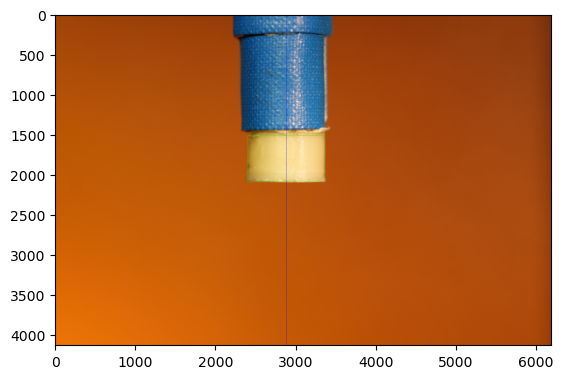

In [32]:
import cv2
import numpy as np

# Load the image
image_path = "/Users/vamsikrishna/Desktop/DSC00250.JPG"
image = cv2.imread(image_path)

# Check if the image has been loaded correctly
if image is None:
    raise ValueError("Could not open or find the image.")

# Convert the image to the HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define a color range for masking that better fits the specimen color
white_lower = np.array([0, 0, 168])
white_upper = np.array([172, 111, 255])

# Threshold the HSV image to get only the colors of the specimen
mask = cv2.inRange(hsv, white_lower, white_upper)

# Perform a series of dilations and erosions to remove any small blobs left in the mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Find contours from the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour and assume this is the specimen
specimen_contour = max(contours, key=cv2.contourArea)

# Calculate the bounding rectangle for the largest contour
x, y, w, h = cv2.boundingRect(specimen_contour)

# Extend the contour by a specific physical distance
# Define your scale here (how many pixels in the image correspond to 1 cm)
scale_pixels_per_cm = 100  # This is an example, you need to calculate this for your image

# Extend the bounding box
x_extended_left = x - 3 * scale_pixels_per_cm  # Extend to the left by 2 cm
x_extended_right = x + w + 1 * scale_pixels_per_cm  # Extend to the right by 1 cm

# Ensure we don't go out of image boundaries
x_extended_left = max(0, x_extended_left)
x_extended_right = min(image.shape[1], x_extended_right)

# Draw the extended bounding rectangle
cv2.rectangle(image, (x_extended_left, y), (x_extended_right, y+h), (0, 255, 0), 2)

# Calculate the centerline based on the extended bounding rectangle
center_x = (x_extended_left + x_extended_right) // 2

# Draw the centerline
cv2.line(image, (center_x, 0), (center_x, image.shape[0]), (255, 0, 0), 2)

# Calculate the radius at each height within the extended bounding box
radius_measurements = []
for i in range(y, y + h):
    row = mask[i, x_extended_left:x_extended_right]
    points = np.where(row == 255)[0]
    if points.size > 0:
        radius_left = center_x - points[0]
        radius_right = points[-1] - center_x
        radius_measurements.append((i, radius_left, radius_right))
        
# # Save the processed image to visualize the extended contour and centerline
# cv2.imwrite('/Users/vamsikrishna/Desktop/processed_image.jpg', image)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.show()


In [33]:
import csv

# Save the radius measurements to a CSV file
with open('/Users/vamsikrishna/Desktop/radius_measurements.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Height", "Radius Left", "Radius Right"])
    for measurement in radius_measurements:
        writer.writerow(measurement)


In [34]:
# Example: If the rheometer completes one rotation (360 degrees) in 60 seconds
# and you took 10 images evenly spaced in time, each image is 36 degrees apart.
rotation_time = 60  # In seconds
number_of_images = 10
angle_increment = 360 / number_of_images

# Calculate the angle for each image
angles = [(i * angle_increment) for i in range(number_of_images)]


In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Placeholder for 3D points
points_3d = []

# Assuming each image is taken at an angle increment in the range
for angle, measurements in zip(angles, all_radius_measurements):
    for height, radius_left, radius_right in measurements:
        # Convert polar coordinates to Cartesian for the left and right radius at each height
        angle_rad = np.deg2rad(angle)
        x_left = radius_left * np.cos(angle_rad)
        y_left = radius_left * np.sin(angle_rad)
        x_right = radius_right * np.cos(angle_rad)
        y_right = radius_right * np.sin(angle_rad)
        # Add the points to the list
        points_3d.append((x_left, y_left, height))
        points_3d.append((x_right, y_right, height))

# Convert the list of tuples to a NumPy array
points_3d_np = np.array(points_3d)

# Create a new matplotlib figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Add the points to the plot
ax.scatter(points_3d_np[:, 0], points_3d_np[:, 1], points_3d_np[:, 2])

# Show the plot
plt.show()


TypeError: cannot unpack non-iterable float object

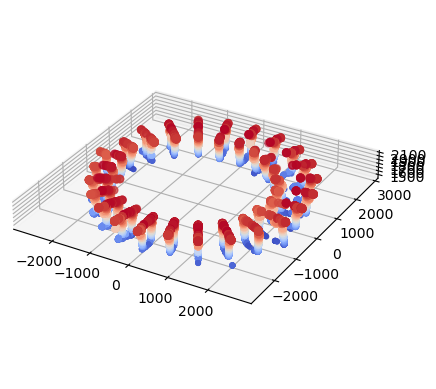

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Function to process a single image and extract radius measurements
def process_image(image_path, scale_pixels_per_cm, center_offset):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Could not open or find the image: " + image_path)
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, white_lower, white_upper)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    specimen_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(specimen_contour)

    x_extended_left = x - 3 * scale_pixels_per_cm
    x_extended_right = x + w + 1 * scale_pixels_per_cm
    x_extended_left = max(0, x_extended_left)
    x_extended_right = min(image.shape[1], x_extended_right)

    center_x = (x_extended_left + x_extended_right) // 2 + center_offset

    radius_measurements = []
    for i in range(y, y + h):
        row = mask[i, x_extended_left:x_extended_right]
        points = np.where(row == 255)[0]
        if points.size > 0:
            radius_left = center_x - points[0]
            radius_right = points[-1] - center_x
            radius_measurements.append((i, radius_left, radius_right))
            
    return radius_measurements

# Define the color range for masking that better fits the specimen color
white_lower = np.array([0, 0, 168])
white_upper = np.array([172, 111, 255])

# Define the scale (this needs to be measured or calculated for your specific case)
scale_pixels_per_cm = 100  # Placeholder value

# Directory containing the images
image_dir = "/Users/vamsikrishna/Desktop/TestImages"

# images are named in sequence like 'DSC00250.JPG', 'DSC00251.JPG', ...
image_paths = [os.path.join(image_dir, f"DSC0025{i}.JPG") for i in range(10)]

# Add 14 more images with different names
additional_images = ["DSC00300.JPG", "DSC00310.JPG", "DSC00320.JPG", "DSC00330.JPG", 
                     "DSC00340.JPG", "DSC00350.JPG", "DSC00360.JPG", "DSC00370.JPG", 
                     "DSC00380.JPG", "DSC00390.JPG", "DSC00400.JPG", "DSC00410.JPG", 
                     "DSC00420.JPG", "DSC00430.JPG"]

# Append the additional images to the image_paths list
image_paths += [os.path.join(image_dir, img) for img in additional_images]

# Initialize list to hold all measurements
all_radius_measurements = []


# Angle calculation assuming that images are equally spaced by 36 degrees
# Modify 'start_angle' if the first image is not taken at 0 degrees
start_angle = 0  # This is the angle of the first selected image
angle_increment = 360 / 24  # Because you have chosen 24 images out of 150

# Loop over each image
for idx, image_path in enumerate(image_paths):
    angle = start_angle + (idx * angle_increment)
    radius_measurements = process_image(image_path, scale_pixels_per_cm, center_offset=0)
    all_radius_measurements.append((angle, radius_measurements))

# Now, for the reconstruction of the 3D model, you'll need to combine the angle with the radius measurements
# Placeholder for 3D points
points_3d = []

for angle, measurements in all_radius_measurements:
    angle_rad = np.deg2rad(angle)
    for (height, radius_left, radius_right) in measurements:
        x_left = radius_left * np.cos(angle_rad)
        y_left = radius_left * np.sin(angle_rad)
        x_right = radius_right * np.cos(angle_rad)
        y_right = radius_right * np.sin(angle_rad)
        points_3d.append((x_left, y_left, height))
        points_3d.append((x_right, y_right, height))

# # Convert the list of tuples to a NumPy array
# points_3d_np = np.array(points_3d)

# # Create a new matplotlib figure and 3D axis
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Add the points to the plot
# ax.scatter(points_3d_np[:, 0], points_3d_np[:, 1], points_3d_np[:, 2])

# # Set the same scale for all axes
# ax.set_box_aspect([np.ptp(points_3d_np[:, 0]), np.ptp(points_3d_np[:, 1]), np.ptp(points_3d_np[:, 2])])

# # Show the plot
# plt.show()

# Create a new matplotlib figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Normalize the heights to the range [0, 1] for color mapping
heights = points_3d_np[:, 2]
normalized_heights = (heights - heights.min()) / heights.ptp()

# Create a colormap
cmap = plt.get_cmap('coolwarm')

# Add the points to the plot with color and size based on height
ax.scatter(points_3d_np[:, 0], points_3d_np[:, 1], points_3d_np[:, 2], c=cmap(normalized_heights), s=20 * normalized_heights + 10)

# Set the same scale for all axes
ax.set_box_aspect([np.ptp(points_3d_np[:, 0]), np.ptp(points_3d_np[:, 1]), np.ptp(points_3d_np[:, 2])])

# Show the plot
plt.show()

In [42]:
# Calculate moments of the contour
M = cv2.moments(specimen_contour)
if M["m00"] != 0:
    # Calculate x,y coordinate of center
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
else:
    # Set some default value if the contour is a line (which would give m00 = 0)
    cX, cY = width // 2, height // 2

# Use the actual center of mass as the centerline
center_x = cX


In [1]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Add this function to visualize the alignment
# def visualize_alignment(image, center_x, y, h, scale_pixels_per_cm, specimen_contour):
#     # Draw the extended bounding rectangle
#     cv2.rectangle(image, (center_x - 3 * scale_pixels_per_cm, y), (center_x + 3 * scale_pixels_per_cm, y + h), (0, 255, 0), 2)

#     # Draw the centerline
#     cv2.line(image, (center_x, 0), (center_x, image.shape[0]), (255, 0, 0), 2)

#     # Draw the contour
#     cv2.drawContours(image, [specimen_contour], -1, (0, 255, 0), 3)

#     # Convert the image from BGR to RGB for plotting
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     # Display the image
#     plt.imshow(image_rgb)
#     plt.show()

# # Assuming you have already defined the 'process_image' function above,
# # modify it to call 'visualize_alignment' after calculating the centerline
# def process_image(image_path, scale_pixels_per_cm, center_offset):
#     image = cv2.imread(image_path)
#     if image is None:
#         raise ValueError("Could not open or find the image: " + image_path)
    
#     hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#     mask = cv2.inRange(hsv, white_lower, white_upper)
#     kernel = np.ones((5, 5), np.uint8)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     specimen_contour = max(contours, key=cv2.contourArea)
#     x, y, w, h = cv2.boundingRect(specimen_contour)

#     x_extended_left = x - 3 * scale_pixels_per_cm
#     x_extended_right = x + w + 1 * scale_pixels_per_cm
#     x_extended_left = max(0, x_extended_left)
#     x_extended_right = min(image.shape[1], x_extended_right)

#     center_x = (x_extended_left + x_extended_right) // 2 + center_offset
# # Calculate the centerline based on the extended bounding rectangle
#     center_x = (x_extended_left + x_extended_right) // 2 + center_offset

# # Call the visualization function to show the alignment
#     visualize_alignment(image, center_x, y, h, scale_pixels_per_cm, specimen_contour)
#     radius_measurements = []
#     for i in range(y, y + h):
#         row = mask[i, x_extended_left:x_extended_right]
#         points = np.where(row == 255)[0]
#         if points.size > 0:
#             radius_left = center_x - points[0]
#             radius_right = points[-1] - center_x
#             radius_measurements.append((i, radius_left, radius_right))
            
#     return radius_measurements


# # Define the color range for masking that better fits the specimen color
# white_lower = np.array([0, 0, 168])
# white_upper = np.array([172, 111, 255])

# # Define the scale (this needs to be measured or calculated for your specific case)
# scale_pixels_per_cm = 100  # Placeholder value

# # Directory containing the images
# image_dir = "/Users/vamsikrishna/Desktop/TestImages"

# # images are named in sequence like 'DSC00250.JPG', 'DSC00251.JPG', ...
# image_paths = [os.path.join(image_dir, f"DSC0025{i}.JPG") for i in range(10)]

# # Add 14 more images with different names
# additional_images = ["DSC00300.JPG", "DSC00310.JPG", "DSC00320.JPG", "DSC00330.JPG", 
#                      "DSC00340.JPG", "DSC00350.JPG", "DSC00360.JPG", "DSC00370.JPG", 
#                      "DSC00380.JPG", "DSC00390.JPG", "DSC00400.JPG", "DSC00410.JPG", 
#                      "DSC00420.JPG", "DSC00430.JPG"]

# # Append the additional images to the image_paths list
# image_paths += [os.path.join(image_dir, img) for img in additional_images]

# # Initialize list to hold all measurements
# all_radius_measurements = []


# # Angle calculation assuming that images are equally spaced by 36 degrees
# # Modify 'start_angle' if the first image is not taken at 0 degrees
# start_angle = 0  # This is the angle of the first selected image
# angle_increment = 360 / 24  # Because you have chosen 24 images out of 150

# # Loop over each image
# for idx, image_path in enumerate(image_paths):
#     angle = start_angle + (idx * angle_increment)
#     radius_measurements = process_image(image_path, scale_pixels_per_cm, center_offset=0)
#     all_radius_measurements.append((angle, radius_measurements))

# # Now, for the reconstruction of the 3D model, you'll need to combine the angle with the radius measurements
# # Placeholder for 3D points
# points_3d = []

# for angle, measurements in all_radius_measurements:
#     angle_rad = np.deg2rad(angle)
#     for (height, radius_left, radius_right) in measurements:
#         x_left = radius_left * np.cos(angle_rad)
#         y_left = radius_left * np.sin(angle_rad)
#         x_right = radius_right * np.cos(angle_rad)
#         y_right = radius_right * np.sin(angle_rad)
#         points_3d.append((x_left, y_left, height))
#         points_3d.append((x_right, y_right, height))

# # Convert the list of tuples to a NumPy array
# points_3d_np = np.array(points_3d)

# # Create a new matplotlib figure and 3D axis
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Add the points to the plot
# ax.scatter(points_3d_np[:, 0], points_3d_np[:, 1], points_3d_np[:, 2])

# # Set the same scale for all axes
# ax.set_box_aspect([np.ptp(points_3d_np[:, 0]), np.ptp(points_3d_np[:, 1]), np.ptp(points_3d_np[:, 2])])

# # Show the plot
# plt.show()